In [1]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from scipy.stats import zscore
from pycaret.classification import *
import typing

import sys
sys.path.insert(1, '..')
from src.preprocessing.preprocess import main

%matplotlib inline 

In [2]:
FILE_PATH = '../data/transactions_dataset.csv'
df_raw = pd.read_csv(FILE_PATH, sep=';')
sample_clients = df_raw.groupby(['client_id']).mean().sample(100).index.to_list()
df_extract = df_raw[df_raw['client_id'].isin(sample_clients)]

In [4]:
split_date = '2019-06-20'
df_churn = main(df_extract)

In [4]:
data = df_churn.query(f"{'date_order'} < @split_date").reset_index(drop=True)
s = setup(data, target = 'churn', ignore_features = ['client_id'])

,Description,Value
0,session_id,754
1,Target,churn
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(1950, 11)"
5,Missing Values,True
6,Numeric Features,8
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


In [5]:
best_model = compare_models(sort='AUC')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.9963,0.9995,0.9200,0.9857,0.9479,0.9460,0.9486,0.2880
lightgbm,Light Gradient Boosting Machine,0.9875,0.9957,0.8100,0.8821,0.8254,0.8192,0.8299,0.0120
gbc,Gradient Boosting Classifier,0.9853,0.9934,0.8433,0.8205,0.8207,0.8132,0.8191,0.0280
rf,Random Forest Classifier,0.9633,0.9881,0.0600,0.2500,0.0952,0.0921,0.1182,0.1050
ada,Ada Boost Classifier,0.9868,0.9729,0.8100,0.8538,0.8137,0.8072,0.8166,0.0190
dt,Decision Tree Classifier,0.9868,0.9116,0.8300,0.8582,0.8262,0.8196,0.8289,0.0050
et,Extra Trees Classifier,0.9626,0.9072,0.0800,0.2833,0.1202,0.1149,0.1419,0.0970
lda,Linear Discriminant Analysis,0.9597,0.8622,0.2533,0.5833,0.3276,0.3100,0.3510,0.0080
nb,Naive Bayes,0.8430,0.6487,0.4433,0.1194,0.1857,0.1333,0.1676,0.1260
knn,K Neighbors Classifier,0.9619,0.6105,0.0000,0.0000,0.0000,0.0000,0.0000,0.1540


In [6]:
# tune best model
tuned_best_model = tune_model(best_model)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9927,1.0000,0.8000,1.0000,0.8889,0.8852,0.8911
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,0.9927,0.9949,1.0000,0.8571,0.9231,0.9193,0.9223
4,0.9926,1.0000,0.8000,1.0000,0.8889,0.8851,0.8910
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
9,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


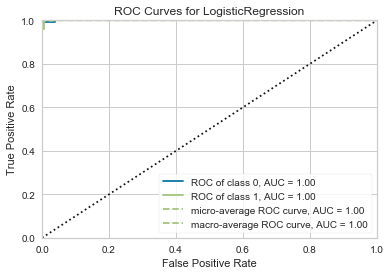

In [7]:
# AUC Plot
plot_model(tuned_best_model, plot = 'auc')

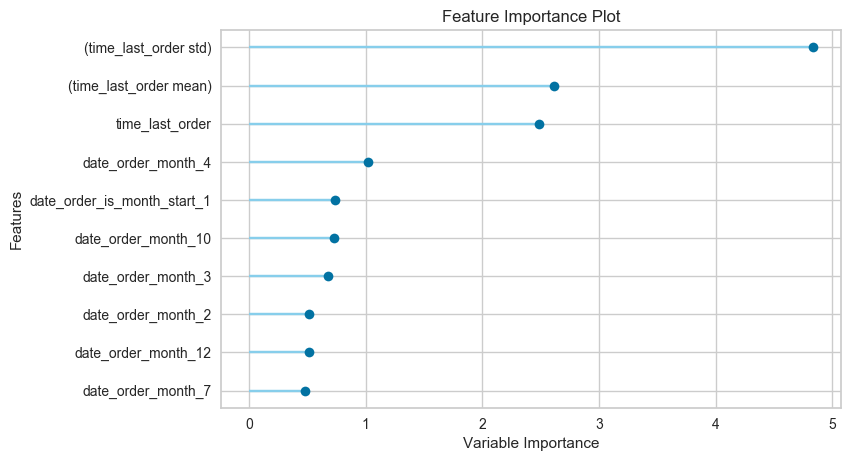

In [8]:
# Feature Importance Plot
plot_model(tuned_best_model , plot = 'feature')

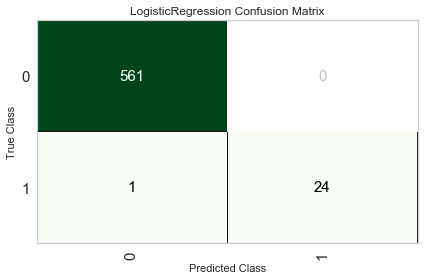

In [9]:
# Confusion Matrix
plot_model(tuned_best_model, plot = 'confusion_matrix')

In [5]:
import plotly.offline as py # visualization
py.init_notebook_mode(connected=True) 
import plotly.graph_objs as go # visualization
train = df_churn
trace = go.Pie(labels = train["churn"].value_counts().keys().tolist(),
               values = train["churn"].value_counts().values.tolist(),
               marker = dict(colors = ["rgb(62,173,146)","rgb(25,122,86)"],
                             line = dict(color = "white", width =  1.3)
                            ),
               rotation = 90,
               hoverinfo = "label+value+text",
               hole = .5
              )
layout = go.Layout(dict(title = "Customer churn in training data",
                        plot_bgcolor = "rgb(255,255,255)",
                        paper_bgcolor = "rgb(255,255,255)",
                       )
                  )
data = [trace]
fig = go.Figure(data = data, layout = layout)
py.iplot(fig)